In [2]:
# Importing all necessary modules

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Import the dataset

dataset = pd.read_csv(r'C:\Users\shaih\OneDrive\Desktop\Home\Home\Programming\Codecademy\nrl-project\nrl_data.csv')
dataset

,Date,Time,Round,Home Team,Away Team,Home Score,Away Score,Home Odds,Away Odds,Line,...,1H F/D Winner,Home 2H,Away 2H,2H Total,HSH,Venue,City,State,Country,Neutral Ven?
0,13/3/09,NaN,1,BRI,NQL,19,18,1.69,2.15,-3.5,...,DRAW,19,18,37,2ND,NaN,NaN,NaN,NaN,NaN
1,13/3/09,NaN,1,MEL,SGI,17,16,1.40,2.93,-8.5,...,DRAW,17,16,33,2ND,NaN,NaN,NaN,NaN,NaN
2,14/3/09,NaN,1,CBY,MAN,34,12,2.52,1.51,6.0,...,DRAW,34,12,46,2ND,NaN,NaN,NaN,NaN,NaN
3,14/3/09,NaN,1,CRO,PEN,18,10,1.42,2.87,-7.5,...,DRAW,18,10,28,2ND,NaN,NaN,NaN,NaN,NaN
4,14/3/09,NaN,1,WAR,PAR,26,18,1.40,2.95,-8.5,...,DRAW,26,18,44,2ND,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,14/8/21,3:00 PM,22,SOU,GLD,36,6,1.18,5.00,-15.5,...,FAV,12,6,18,1ST,Cbus Super Stadium,Gold Coast,QLD,AUS,AWAY
2559,14/8/21,5:30 PM,22,NQL,WST,16,24,2.40,1.62,3.5,...,FAV,10,12,22,2ND,Queensland Country Bank Stadium,Townsville,QLD,AUS,NaN
2560,14/8/21,7:35 PM,22,MAN,PAR,56,10,1.22,5.00,-14.5,...,FAV,30,6,36,2ND,Sunshine Coast Stadium,Sunshine Coast,QLD,AUS,YES
2561,15/8/21,1:50 PM,22,WAR,CBY,24,10,1.42,3.10,-7.5,...,FAV,8,0,8,1ST,Moreton Daily Stadium,Redcliffe,QLD,AUS,YES


Due to the complications caused by the Covid-19 pandemic, I'll only look at data from 2009-2019 for now.

In [4]:
# Removing 2021 data from dataset

dataset_modified = dataset.copy()

dataset_modified["Date"] = pd.to_datetime(dataset_modified["Date"])
dataset_modified["Year"] = pd.DatetimeIndex(dataset_modified["Date"]).year

dataset_modified = dataset_modified[(dataset_modified.Year != 2021) & (dataset_modified.Year != 2020)]

dataset_modified

,Date,Time,Round,Home Team,Away Team,Home Score,Away Score,Home Odds,Away Odds,Line,...,Home 2H,Away 2H,2H Total,HSH,Venue,City,State,Country,Neutral Ven?,Year
0,2009-03-13,NaN,1,BRI,NQL,19,18,1.69,2.15,-3.5,...,19,18,37,2ND,NaN,NaN,NaN,NaN,NaN,2009
1,2009-03-13,NaN,1,MEL,SGI,17,16,1.40,2.93,-8.5,...,17,16,33,2ND,NaN,NaN,NaN,NaN,NaN,2009
2,2009-03-14,NaN,1,CBY,MAN,34,12,2.52,1.51,6.0,...,34,12,46,2ND,NaN,NaN,NaN,NaN,NaN,2009
3,2009-03-14,NaN,1,CRO,PEN,18,10,1.42,2.87,-7.5,...,18,10,28,2ND,NaN,NaN,NaN,NaN,NaN,2009
4,2009-03-14,NaN,1,WAR,PAR,26,18,1.40,2.95,-8.5,...,26,18,44,2ND,NaN,NaN,NaN,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,2019-09-20,7:50 PM,SF,SOU,MAN,34,26,1.42,3.09,-6.5,...,34,26,60,2ND,NaN,NaN,NaN,NaN,NaN,2019
2216,2019-09-21,7:50 PM,SF,MEL,PAR,32,0,1.35,3.36,-8.0,...,32,0,32,2ND,NaN,NaN,NaN,NaN,NaN,2019
2217,2019-09-27,7:50 PM,PF,CAN,SOU,16,10,1.40,3.21,-7.5,...,16,10,26,2ND,NaN,NaN,NaN,NaN,NaN,2019
2218,2019-09-28,7:50 PM,PF,SYD,MEL,14,6,1.58,2.48,-4.0,...,14,6,20,2ND,NaN,NaN,NaN,NaN,NaN,2019


A lot of my data contains missing values. I'll remove these unnecessary columns with missing values to condense the dataset

In [5]:
# Removing unneeded columns from dataset

dataset_modified = dataset_modified.drop(columns=["Time", "Weather", "Temp", "H Streak", "A Streak", "Home 1H", "Away 1H", "1H Line", "1H Total Line", "H/A Win?", "Winner", "W Margin", "Cov Margin", \
                                                  "F/D Win", "Fav", "Dog", "1H Cover", "1H H/A Cover", "1H F/D Cover", "1H Total", "1H Winner", "1H H/A Winner", "1H F/D Winner", "Home 2H", "Away 2H", \
                                                  "2H Total", "HSH", "Venue", "City", "State", "Country", "Neutral Ven?", "Year"])

dataset_modified

,Date,Round,Home Team,Away Team,Home Score,Away Score,Home Odds,Away Odds,Line,Cover,H/A Cover,F/D Cover,Total Line,O/U,Total
0,2009-03-13,1,BRI,NQL,19,18,1.69,2.15,-3.5,NQL,AWAY,DOG,NaN,NaN,37
1,2009-03-13,1,MEL,SGI,17,16,1.40,2.93,-8.5,SGI,AWAY,DOG,NaN,NaN,33
2,2009-03-14,1,CBY,MAN,34,12,2.52,1.51,6.0,CBY,HOME,DOG,NaN,NaN,46
3,2009-03-14,1,CRO,PEN,18,10,1.42,2.87,-7.5,CRO,HOME,FAV,NaN,NaN,28
4,2009-03-14,1,WAR,PAR,26,18,1.40,2.95,-8.5,PAR,AWAY,DOG,NaN,NaN,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,2019-09-20,SF,SOU,MAN,34,26,1.42,3.09,-6.5,SOU,HOME,FAV,37.5,OVER,60
2216,2019-09-21,SF,MEL,PAR,32,0,1.35,3.36,-8.0,MEL,HOME,FAV,36.5,UNDER,32
2217,2019-09-27,PF,CAN,SOU,16,10,1.40,3.21,-7.5,SOU,AWAY,DOG,38.5,UNDER,26
2218,2019-09-28,PF,SYD,MEL,14,6,1.58,2.48,-4.0,SYD,HOME,FAV,34.5,UNDER,20


# Investigating Home Advantage

First, I'll investigate 'home advantage' and how it impacts a team's win percentage.

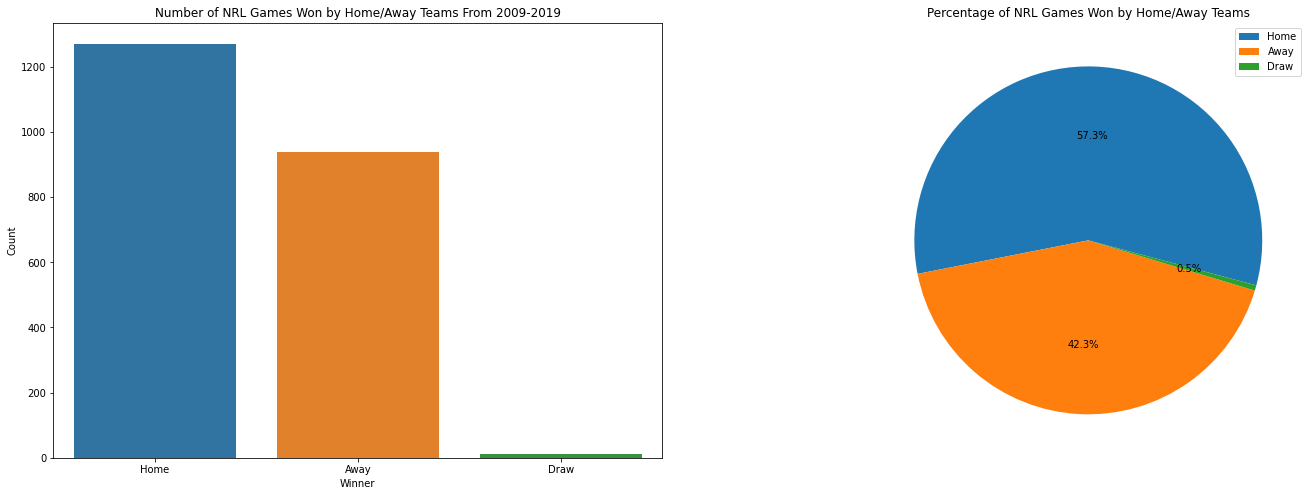

In [6]:
# Let's find the win % of home teams compared to away teams for the dataset

def winner(row):
    if row["Home Score"] > row["Away Score"]:
        return row["Home Team"]
    elif row["Home Score"] < row["Away Score"]:
        return row["Away Team"]
    return "Draw"

dataset_modified["Winner"] = dataset_modified.apply(lambda row: winner(row), axis=1)

def winner_home_away(row):
    if row["Winner"] == row["Home Team"]:
        return "Home"
    elif row["Winner"] == row["Away Team"]:
        return "Away"
    return "Draw"

dataset_modified["H/A Winner"] = dataset_modified.apply(lambda row: winner_home_away(row), axis=1)

num_winner_home = len(dataset_modified[dataset_modified["H/A Winner"] == "Home"])
num_winner_away = len(dataset_modified[dataset_modified["H/A Winner"] == "Away"])
num_winner_draw = len(dataset_modified[dataset_modified["H/A Winner"] == "Draw"])
num_matches = len(dataset_modified)

pie_values = [num_winner_home, num_winner_away, num_winner_draw]

fig = plt.figure(figsize=(24,8))

ax1 = plt.subplot(1, 2, 1)

sns.countplot(data = dataset_modified, x = "H/A Winner")

ax1.set_title("Number of NRL Games Won by Home/Away Teams From 2009-2019")
ax1.set_xlabel("Winner")
ax1.set_ylabel("Count")


labels = ["Home", "Away", "Draw"]

ax2 = plt.subplot(1, 2, 2)

plt.pie(pie_values, autopct='%0.1f%%', startangle=345)

ax2.set_title("Percentage of NRL Games Won by Home/Away Teams")
ax2.legend(labels)

Next, I'll investigate how this differs between teams i.e. which teams have the greatest 'home advantage'. I'll calculate home advantage as home rate / away rate.

In [7]:
teams = ["BRI", "CAN", "CBY", "CRO", "GLD", "MAN", "MEL", "NEW", "NQL", "PAR", "PEN", "SGI", "SOU", "SYD", "WAR", "WST"]

home_win_rates = []
away_win_rates = []

for team in teams:
    num_home_wins_team = len(dataset_modified[(dataset_modified["Home Team"] == team) & (dataset_modified["Winner"] == team)])
    num_away_wins_team = len(dataset_modified[(dataset_modified["Away Team"] == team) & (dataset_modified["Winner"] == team)])

    num_home_games_team = len(dataset_modified[(dataset_modified["Home Team"]) == team])
    num_away_games_team = len(dataset_modified[(dataset_modified["Away Team"]) == team])

    home_win_rate_team = ((num_home_wins_team / num_home_games_team) * 100) - 1
    away_win_rate_team = ((num_away_wins_team / num_away_games_team) * 100) - 1

    home_win_rates.append(home_win_rate_team)
    away_win_rates.append(away_win_rate_team)

home_advantages = (np.array(home_win_rates) / np.array(away_win_rates))* 100 - 100

home_advantages_data = {"Home Win Rate": home_win_rates, "Away Win Rate": away_win_rates, "Home Advantage": home_advantages}

home_advantages_df = pd.DataFrame(home_advantages_data)

home_advantages_df.insert(0, 'Team', teams)

home_advantages_df.sort_values('Home Advantage', ascending=False)

,Team,Home Win Rate,Away Win Rate,Home Advantage
8,NQL,61.500000,37.620690,63.473877
11,SGI,60.764706,38.130435,59.360118
9,PAR,49.735294,31.352941,58.630394
7,NEW,45.212121,28.927007,56.297265
10,PEN,58.558824,38.130435,53.575022
14,WAR,51.272727,34.507246,48.585392
5,MAN,62.120567,44.000000,41.183108
0,BRI,64.248227,46.517730,38.115566
15,WST,50.851852,37.059701,37.216032
13,SYD,61.837838,47.905109,29.084013


On average, teams have a win rate of 57.3% when playing at home. This signifies a 35.4% advantage when compared to playing away (average win rate of 42.3%).


As we can see, all teams have an advantage when playing at home, although different teams have different advantages.
The Cowboys have the greatest advantage of all the teams, with a whopping 63.5% home advantage. On the other end of the spectrum, the Titans have the smallest advantage with an increase of 13.5% (still a noticeable improvement over playing away games).

# How often are betting companies able to predict the winner?

In the dataset, the 'Line' column represents a handicap market provided by bookmaker Bet365. If the value for the line is < 0, then the home team is the favourite. If its > 0, then the away team is the favourite.

First, I'll explore how often home teams are listed as favourites by the bookmaker.

([<matplotlib.patches.Wedge at 0x140647569a0>,
 [Text(-0.4811805812973964, 0.9891740232043601, 'Home'),
  Text(0.48118058129739577, -0.9891740232043603, 'Away')],
 [Text(-0.2624621352531253, 0.5395494672023782, '64.4%'),
  Text(0.26246213525312495, -0.5395494672023783, '35.6%')])

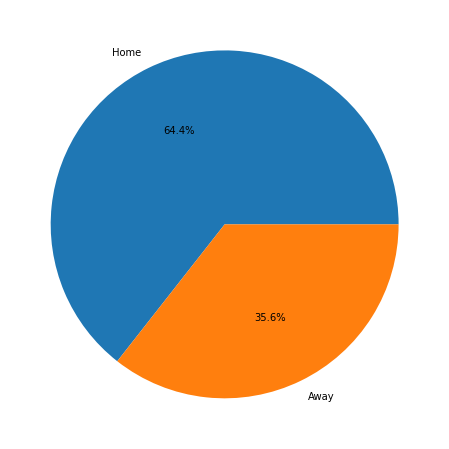

In [8]:
def home_away_fav(row):
    if row["Line"] < 0:
        return "Home"
    elif row["Line"] > 0:
        return "Away"
    return "N/A"

dataset_modified["H/A Fav"] = dataset_modified.apply(lambda row: home_away_fav(row), axis=1)

num_home_favs = len(dataset_modified[dataset_modified["H/A Fav"] == "Home"])
num_away_favs = len(dataset_modified[dataset_modified["H/A Fav"] == "Away"])

values = [num_home_favs, num_away_favs]
labels = ["Home", "Away"]

fig = plt.figure(figsize=(12,8))

plt.pie(values, autopct='%0.1f%%', labels=labels)

As we can see, betting companies seem to account for home advantage quite heavily, with the home team being named favourite in 64.4% of games.

This implies that, generally, there is value betting on the away side as the true win % of home teams is 57.3%.

Next, I'll find how often the favourite wins.

In [9]:
dataset_copy = dataset_modified.copy()

def fav_win(row):
    if row["H/A Winner"] == "Draw":
        return float('NaN')
    elif row["H/A Winner"] == row["H/A Fav"]:
        return 1
    else:
        return 0

dataset_copy["Correct Fav"] = dataset_copy.apply(lambda row: fav_win(row), axis=1)

num_fav_wins = np.sum(dataset_copy['Correct Fav'])
num_games = len(dataset_copy.dropna(subset=["Correct Fav"]))

fav_win_prcnt = (num_fav_wins / num_games) * 100
fav_win_prcnt

65.14259846084201

As we can see, the bookmaker was able to correctly pick the favourite for 65.1% of games from 2009-2019.

# Is there a trend in total points per game over the years?

To do this, I'll find the average total per game for each year from 2009-2019.

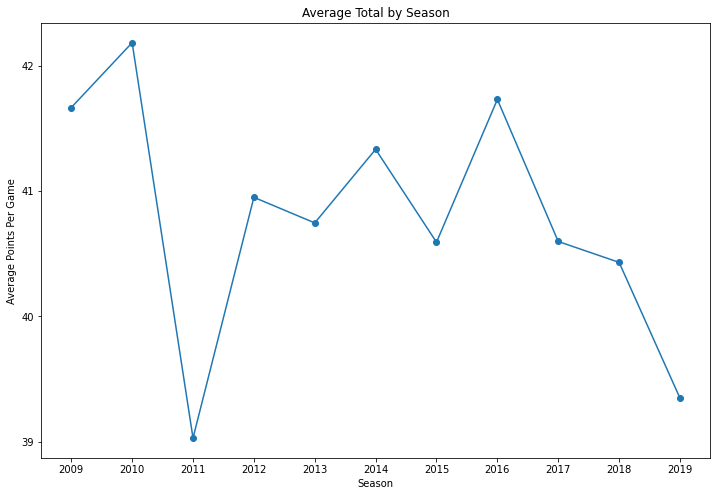

In [10]:
years = range(2009, 2020)
yearly_total_avgs = []

dataset_copy["Year"] = pd.DatetimeIndex(dataset_copy["Date"]).year

for year in range(2009, 2020):
    yearly_total = np.sum(dataset_copy["Total"][dataset_copy['Year'] == year])
    yearly_games = len(dataset_copy[dataset_copy['Year'] == year])
    yearly_total_avg = yearly_total / yearly_games
    yearly_total_avgs.append(yearly_total_avg)


fig = plt.figure(figsize=(12,8))

ax = plt.subplot()

plt.plot(years, yearly_total_avgs, marker = "o")

ax.set_title("Average Total by Season")
ax.set_xlabel("Season")
ax.set_ylabel("Average Points Per Game")

ax.set_xticks(range(2009, 2020))
ax.set_yticks(range(39, 43))

As we can see, the average total points per game has remained relatively stable over the last decade. Although, we can see a slight downwards trend via the line graph.

# What are the characteristics of premiership-winning teams?

First, let's import data showing the premiership-winning teams from 2009-2019

In [64]:
premiership_data = pd.read_csv(r'C:\Users\shaih\OneDrive\Desktop\Home\Home\Programming\Codecademy\nrl-project\nrl_premiers.csv')
premiership_data

,Year,Team
0,2009,MEL
1,2010,SGI
2,2011,MAN
3,2012,MEL
4,2013,SYD
5,2014,SOU
6,2015,NQL
7,2016,CRO
8,2017,MEL
9,2018,SYD


In [72]:
dataset_new = dataset_modified[(dataset_modified["Round"] != "GF") & (dataset_modified["Round"] != "PF") & (dataset_modified["Round"] != "SF") & (dataset_modified["Round"] != "F1")]
dataset_new['Year'] = pd.DatetimeIndex(dataset_new['Date']).year
dataset_new

C:\Users\shaih\AppData\Local\Temp/ipykernel_20428/377510062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Year'] = pd.DatetimeIndex(dataset_new['Date']).year


,Date,Round,Home Team,Away Team,Home Score,Away Score,Home Odds,Away Odds,Line,Cover,H/A Cover,F/D Cover,Total Line,O/U,Total,Winner,H/A Winner,H/A Fav,Year
0,2009-03-13,1,BRI,NQL,19,18,1.69,2.15,-3.5,NQL,AWAY,DOG,NaN,NaN,37,BRI,Home,Home,2009
1,2009-03-13,1,MEL,SGI,17,16,1.40,2.93,-8.5,SGI,AWAY,DOG,NaN,NaN,33,MEL,Home,Home,2009
2,2009-03-14,1,CBY,MAN,34,12,2.52,1.51,6.0,CBY,HOME,DOG,NaN,NaN,46,CBY,Home,Away,2009
3,2009-03-14,1,CRO,PEN,18,10,1.42,2.87,-7.5,CRO,HOME,FAV,NaN,NaN,28,CRO,Home,Home,2009
4,2009-03-14,1,WAR,PAR,26,18,1.40,2.95,-8.5,PAR,AWAY,DOG,NaN,NaN,44,WAR,Home,Home,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2019-07-09,25,CAN,WAR,20,24,1.24,4.22,-10.5,WAR,AWAY,DOG,44.5,UNDER,44,WAR,Away,Home,2019
2207,2019-07-09,25,CBY,BRI,30,14,2.40,1.68,4.0,CBY,HOME,DOG,38.5,OVER,44,CBY,Home,Away,2019
2208,2019-07-09,25,GLD,SGI,16,24,2.30,1.66,2.5,SGI,AWAY,FAV,46.5,UNDER,40,SGI,Away,Away,2019
2209,2019-08-09,25,WST,CRO,8,25,2.05,1.81,1.5,CRO,AWAY,FAV,39.5,UNDER,33,CRO,Away,Away,2019


In [144]:
years = list(range(2009,2020))*16
years.sort()

team_attack_avgs = []
team_defense_avgs = []

for year in range(2009, 2020):
    for team in teams:
        team_yearly_points_scored = np.sum(dataset_new['Home Score'][(dataset_new['Home Team'] == team) & (dataset_new['Year'] == year)]) + \
                                    np.sum(dataset_new['Away Score'][(dataset_new['Away Team'] == team) & (dataset_new['Year'] == year)])
        team_avg_points_scored = team_yearly_points_scored / 24.0
        team_attack_avgs.append(team_avg_points_scored)

        team_yearly_points_conceded = np.sum(dataset_new['Away Score'][(dataset_new['Home Team'] == team) & (dataset_new['Year'] == year)]) + \
                                    np.sum(dataset_new['Home Score'][(dataset_new['Away Team'] == team) & (dataset_new['Year'] == year)])
        team_avg_points_conceded = team_yearly_points_conceded / 24.0
        team_defense_avgs.append(team_avg_points_conceded)
        

team_rankings = {"Avg Points Scored": team_attack_avgs, "Avg Points Conceded": team_defense_avgs}

team_rankings_df = pd.DataFrame(team_rankings)

team_rankings_df.insert(0, 'Team', teams*11)
team_rankings_df.insert(0, 'Year', years)

,Year,Team,Avg Points Scored,Avg Points Conceded
0,2009,BRI,21.291667,23.583333
1,2009,CAN,20.375000,21.666667
2,2009,CBY,23.958333,17.833333
3,2009,CRO,14.958333,23.666667
4,2009,GLD,21.416667,19.458333
...,...,...,...,...
171,2019,SGI,17.791667,23.958333
172,2019,SOU,21.708333,17.375000
173,2019,SYD,26.125000,15.125000
174,2019,WAR,18.041667,23.916667


Now, I will give each team an attacking and defensive rank, based on the 'points scored'  and 'points conceded' columns

In [171]:
team_rankings_df = team_rankings_df.sort_values(['Year', 'Avg Points Scored'], ascending=['True', 'False'])

rank = list(range(16, 0, -1))*11

team_rankings_df.insert(3, 'Attacking Rank', rank)

def_rank = list(range(1, 17))*11

team_rankings_df = team_rankings_df.sort_values(['Year', 'Avg Points Conceded'], ascending=['True', 'True'])

team_rankings_df.insert(5, 'Defensive Rank', def_rank)

Now, let's join our table of premiers with the table we've just made to see how they rank in attack and defense.

In [174]:
premiership_df = pd.merge(premiership_data, team_rankings_df, how="inner", left_on=["Year", "Team"], right_on=["Year", "Team"])
premiership_df

,Year,Team,Avg Points Scored,Attacking Rank,Avg Points Conceded,Defensive Rank
0,2009,MEL,21.041667,11,14.500000,2
1,2010,SGI,21.583333,8,12.458333,1
2,2011,MAN,22.458333,1,13.791667,2
3,2012,MEL,24.125000,2,15.041667,1
4,2013,SYD,25.833333,1,13.541667,1
5,2014,SOU,24.375000,3,15.041667,1
6,2015,NQL,24.458333,2,19.000000,5
7,2016,CRO,24.166667,3,16.833333,3
8,2017,MEL,26.375000,1,14.000000,1
9,2018,SYD,22.583333,4,15.041667,1


In [179]:
premiers_avg_att_rank = np.mean(premiership_df["Attacking Rank"])
premiers_avg_points_scored = np.mean(premiership_df["Avg Points Scored"])

premiers_avg_def_rank = np.mean(premiership_df["Defensive Rank"])
premiers_avg_points_conceded = np.mean(premiership_df["Avg Points Conceded"])

print(f"From this table, we can see that the average premiership-winning team scores on average {round(premiers_avg_points_scored, 2)} points per game, whilst conceding {round(premiers_avg_points_conceded, 2)}.\nThese marks result in an average attacking rank of {round(premiers_avg_att_rank, 2)} and an average defensive rank of {round(premiers_avg_def_rank, 2)}")

From this table, we can see that the average premiership-winning team scores on average 23.92 points per game, whilst conceding 14.94.
These marks result in an average attacking rank of 3.45 and an average defensive rank of 1.82


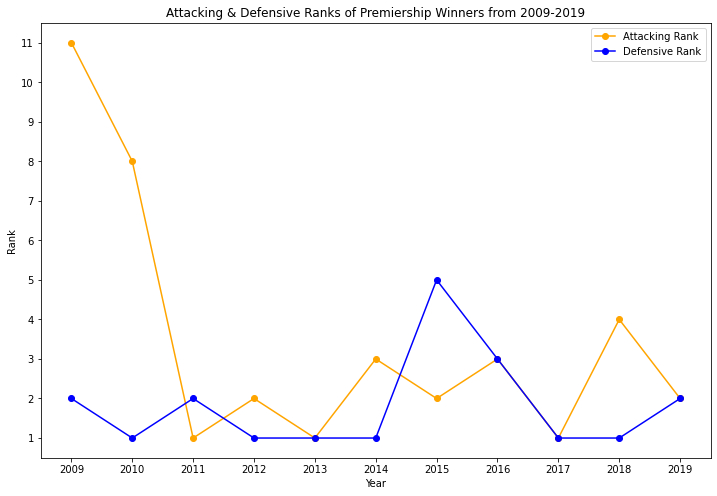

In [189]:
fig = plt.figure(figsize=(12, 8))

ax = plt.subplot()

plt.plot(range(2009, 2020), premiership_df["Attacking Rank"], color = "orange", marker="o", label = "Attacking Rank")
plt.plot(range(2009, 2020), premiership_df["Defensive Rank"], color = "blue", marker="o", label = "Defensive Rank")

plt.legend()
plt.title("Attacking & Defensive Ranks of Premiership Winners from 2009-2019")
plt.xlabel("Year")
plt.ylabel("Rank")

ax.set_xticks(range(2009, 2020))
ax.set_yticks(range(1, 12))